<a href="https://colab.research.google.com/github/PTWeinberg/Microsoft-practice/blob/master/signs_weinberg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Note: After you run this cell, the training and test data will be available in
# the file browser. (Click the folder icon on the left to view it)
#
# If you don't see the data after the cell completes, click the refresh button
# in the file browser (folder icon with circular arrow)

# First, let's download and unzip the data
!echo "Downloading files..."
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/training1.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/training2.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test_partial.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test_classes_partial.csv

!echo "Unzipping files..."
!unzip -q /content/training1.zip
!unzip -q /content/training2.zip
!unzip -q /content/test.zip
!unzip -q /content/test_partial.zip

# Combine the two traning directories
!echo "Merging training data..."
!mkdir /content/training
!mv /content/training1/* /content/training
!mv /content/training2/* /content/training

# Cleanup
!echo "Cleaning up..."
!rmdir /content/training1
!rmdir /content/training2
!rm training1.zip
!rm training2.zip
!rm test.zip
!rm test_partial.zip

!echo "Data ready."

Unzipping files...
Merging training data...
Cleaning up...
Data ready.


In [2]:
# Import libraries
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Dropout

In [3]:
# We're using keras' ImageDataGenerator class to load our image data.
# See (https://keras.io/api/preprocessing/image/#imagedatagenerator-class) for details
#
# A couple of things to note:
# 1. We're specifying a number for the seed, so we'll always get the same shuffle and split of our images.
# 2. Class names are inferred automatically from the image subdirectory names.
# 3. We're splitting the training data into 80% training, 20% validation. 


training_dir = '/content/training/'
image_size = (100, 100)

# Split up the training data images into training and validations sets
# We'll use and ImageDataGenerator to do the splits
# ImageDataGenerator can also be used to do preprocessing and agumentation on the files as can be seen with rescale

# Class thought:
# Image generators are ways of pulling your images in an augmented way. Can use this for your data augmentation??
# Adjusting colors, brightness, tilt?etc...
# one byte per pixel. 256 being 0-255.
train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=.2
        )
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=.2
        )

train_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size = image_size,
        subset="training",
        batch_size=32,
        class_mode='sparse',
        seed=42,shuffle=True)
validation_generator = validation_datagen.flow_from_directory(
        training_dir,
        target_size=image_size,
        batch_size=32,
        class_mode='sparse',
        subset="validation",
        seed=42)



Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [4]:
# train_generator.labels.value_counts()

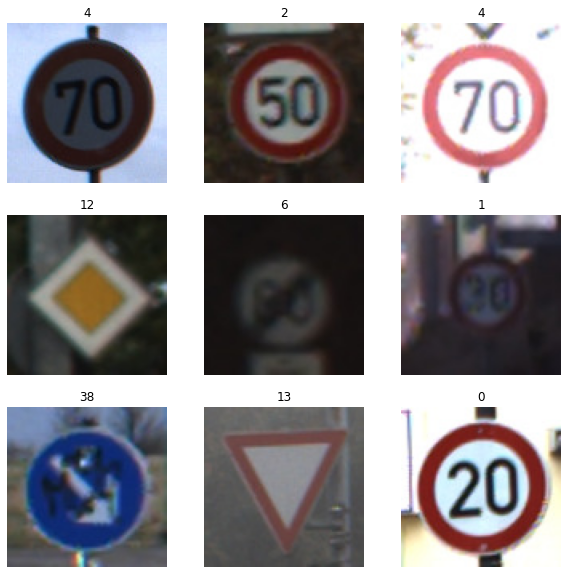

In [5]:
# View 9 images and their class labels
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(9):
        first_image = images.tolist()[i]      
        ax = plt.subplot(3, 3, i + 1)
        f = np.array(first_image)*255
        plt.imshow(f.astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    break

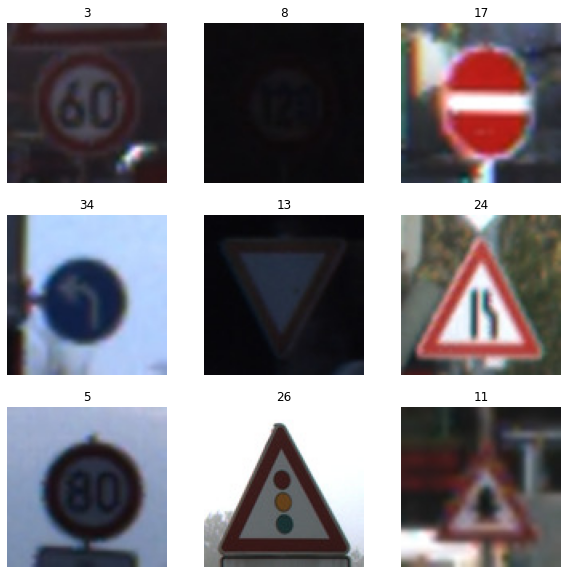

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(9):
        first_image = images.tolist()[i]      
        ax = plt.subplot(3, 3, i + 1)
        f = np.array(first_image)*255
        plt.imshow(f.astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    break

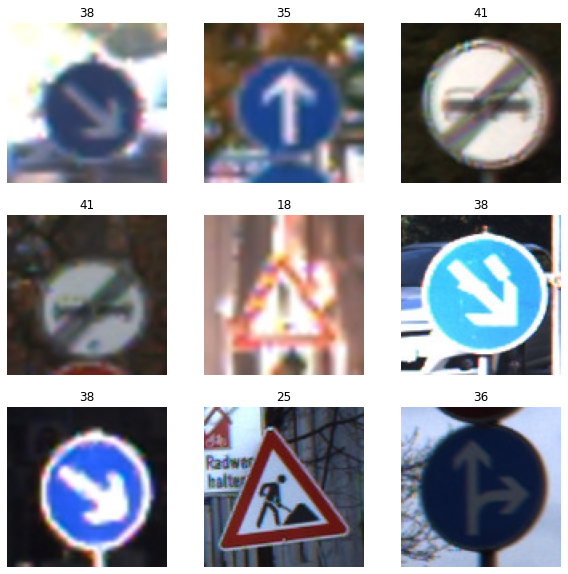

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(9):
        first_image = images.tolist()[i]      
        ax = plt.subplot(3, 3, i + 1)
        f = np.array(first_image)*255
        plt.imshow(f.astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    break

We have 43 classes, spatially they are all in the middle and taking up much of the image space.

In [8]:
validation_generator.classes
validation_generator.image_shape
validation_generator.num_classes

43

Looking into different architectures. I feel that deeper might overfit and be too much because I feel that there isn't too much going on in these images. Notes about this on my ipad, I've come to the conclusion that a shallower version of the VGG-16 will be best. Good at classifying between dif classes, and not as deep so less likely to overfit. This will be a cusom model.

In [ ]:
# Build a model...

# Augment the data?? Have more variations of these road signs
# - increasing brigtness by upping every pixel, or down to darken. rotate, flip
# Don't forget to have dropout layer to prevent overfitting

# Remember this is classification - think about those metrics.

# Batch normalization is imp in cnn's. It's like dropout and can be added like a layer in your network.
# residual connections- where allow some synaptic weights to bypass an entire layer of neurons. Look into what residual connections really are, and/or ask more questions.
# resnet really made these more possible.

# Can import model
# Can perform transfer learning- help it learn my sign data and start classifying that, with head start on what learned previously?

# Make sure numbers of inputs and outputs for layers make sense if have dimension mismatches- also look into logits, sparse, categorical, and binary in this context if having those problems.

Two, pooling, two, pooling, three, pooling, three dense - output

In [9]:
num_classes = 43

model1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape = (100,100,3)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(256, 3, activation='relu'), # added, neurons for these 3 to 256
  tf.keras.layers.Conv2D(256, 3, activation='relu'), # added
  tf.keras.layers.Conv2D(256, 3, activation='relu'), # added
  tf.keras.layers.MaxPooling2D(), # added
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
model1.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
# For early stopping

In [10]:
model1.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 7
)
# Once vaidation acc is going down again then we are overfitting.

# Epoch 7 was the top then val_accuracy started going down. acc 0.9945, val_acc 0.9625, took screenshot
# Screenshot of 2nd run at 7 epochs. val_acc did go down from 3 to 4. but then seemed goor till 7 at .9938 w/ val_acc of 0.9628.
# Screenshot of 3rd, a little more different haha. Down after 5 twice.

# Add dropout layers.
# loop keeping track of validation accuracy, not improving within 10 epochs or something- stop and save best model.
# Small changes in augmentation, too drastic its just different or noise.
# If see struggling classes- may want to under or oversample.
'''
How know which one is struggling and may need to oversample. Can classification report, but its expecting not the datagens but the actual data with the actual class names.
and other classification metrics like f1, recall, precision.
'''
# Look at the holdout images and see what really going for.
# Batch Normalization, residual connections, regularization (about restricting the size of the weight vector?) - helps prevent overfitting, dilation - about looking at a bigger range, with fewer pixels. 

Epoch 1/7
981/981 [==============================] - 46s 34ms/step - loss: 3.2720 - accuracy: 0.1037 - val_loss: 2.0649 - val_accuracy: 0.4051
Epoch 2/7
981/981 [==============================] - 33s 34ms/step - loss: 0.5651 - accuracy: 0.8219 - val_loss: 0.3799 - val_accuracy: 0.8847
Epoch 3/7
981/981 [==============================] - 33s 34ms/step - loss: 0.1058 - accuracy: 0.9671 - val_loss: 0.2240 - val_accuracy: 0.9453
Epoch 4/7
981/981 [==============================] - 33s 33ms/step - loss: 0.0591 - accuracy: 0.9821 - val_loss: 0.2384 - val_accuracy: 0.9415
Epoch 5/7
981/981 [==============================] - 32s 33ms/step - loss: 0.0523 - accuracy: 0.9846 - val_loss: 0.2546 - val_accuracy: 0.9462
Epoch 6/7
901/981 [==========================>...] - ETA: 2s - loss: 0.0510 - accuracy: 0.9857

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        classes=['test_partial'],
        target_size=image_size,
        class_mode='sparse',
        shuffle=False)
probabilities = model1.predict(test_generator)
predictions = [np.argmax(probas) for probas in probabilities]

Found 201 images belonging to 1 classes.


In [ ]:
predictions
# len(predictions)

In [ ]:
gt_class_labels = pd.read_csv("test_classes_partial.csv")
gt_class_labels["ClassId"].value_counts()
# That top class 25 is triangle with red border, white inner, man digging

In [ ]:
# Metrics
from sklearn import metrics
metrics.accuracy_score(gt_class_labels["ClassId"], predictions)
# 0.9303482587064676 w my og
# With deeper network- 0.9502487562189055 baby!!

0.9502487562189055

In [ ]:
print(metrics.classification_report(gt_class_labels["ClassId"], predictions))
# A few of these down at 0.67. #'s 24,26,28,31,34,41
# Some of these all red triangle with white inside and something. If blury or hard to see it may be hard for model to differentiate between
# however many have this base look.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.85      1.00      0.92        11
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        10
           4       0.90      1.00      0.95         9
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8
           8       0.83      0.83      0.83         6
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         8
          12       0.88      1.00      0.93         7
          13       1.00      1.00      1.00        10
          14       1.00      0.75      0.86         4
          15       0.67      1.00      0.80         2
          16       1.00      1.00      1.00         5
          17       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
metrics.plot_confusion_matrix(model1, X_val, y_val)

## Testing the model
Once you have built and trained your model, the next step is to run the test images through it and see how well your model does at making predictions for images it has never seen before. 

Since loading these images and formatting them for the model can be tricky, you may find the following code useful. This code only uses your model to predict the class label for a given image. You'll still need to compare those predictions to the "ground truth" class labels in `test_classes_partial.csv` to evaluate how well the model does.



```
from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        classes=['test_partial'],
        target_size=image_size,
        class_mode='sparse',
        shuffle=False)
probabilities = model.predict(test_generator)
predictions = [np.argmax(probas) for probas in probabilities]
```



##Partial Hold out Dataset
You're given the answers to the first 200 images in the hold out dataset. 

Once you have predictions for the partial holdout dataset, you'll need to compare those predictions against the "ground truth" class labels in `test_classes_partial.csv` to evaluate how well the model does. 

Make sure to use the insights gained from the partial hold out dataset in your executive summary.

Once you feel confident, you will need to predict for the full test dataset using the following code, and submit your csv file:

```
from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        classes=['test'],
        target_size=image_size,
        class_mode='sparse',
        shuffle=False)
probabilities = model.predict(test_generator)
predictions = [np.argmax(probas) for probas in probabilities]
```